### this book will examine the theory site: http://neuralnetworksanddeeplearning.com/

The purpose is to translate the theory into keras code and show "how simple" it is to implement the theory into code

Assumption is that you have already installed the tensorflow/keras

#### setting up the environment

In [1]:
# I am using tensorflow/keras
import numpy as np
from tensorflow import keras

# common plotting library
from matplotlib import pyplot as plt

# this inline tells jupyter notebook to display the maps and graphics inside the notebook
%matplotlib inline

#### download MNIST data
keras comes with MNIST data configured as 28x28 matrix

In [2]:
# get mnist data
mnist = keras.datasets.mnist

# this will download only once and save to cache located at  ~/.keras/data/
print('loading MNIST data...')
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#show the "shape" of downloaded data
print('train data size:', x_train.shape)
print('train label (expected) value size:', y_train.shape)
print('test data size:', x_test.shape)
print('test expected value:',y_test.shape)


loading MNIST data...
train data size: (60000, 28, 28)
train label (expected) value size: (60000,)
test data size: (10000, 28, 28)
test expected value: (10000,)


#### show MNIST data
Here is a way to display a big chunk of digits


MNIST data. Offset: 0


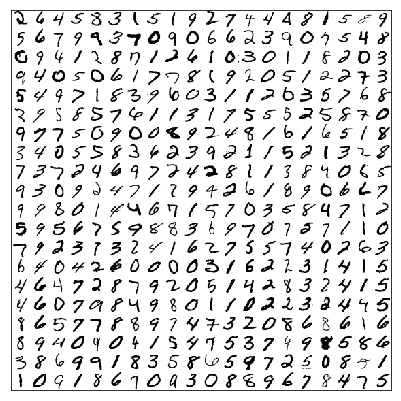

In [3]:
#function to copy 1 mage to larger image map
def copy_image(target , ty, tx, src):
    for y in range(28):
        for x in range(28):
            target[ty*28+y][tx*28+x] = src[y][x]
    return target

# show 20 x 20. You may change the ysize,xsize,offset

ysize = 20
xsize = 20

# from where to show
start_offset = 0
base_index = start_offset +(ysize * xsize)

print('MNIST data. Offset:', start_offset)

image = np.zeros((28*ysize, 28*xsize), dtype=np.int)

for y in range(ysize):
    for x in range(xsize):
        index = y*xsize + x
        src = x_train[index + base_index]
        image = copy_image(image , y ,x , src)


plt.figure(figsize=(7,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image , cmap='gray_r')
plt.show()
plt.close()

#### and here is a way to show one digit only

showing number 9 ,from index: 100 ,max label: 60000


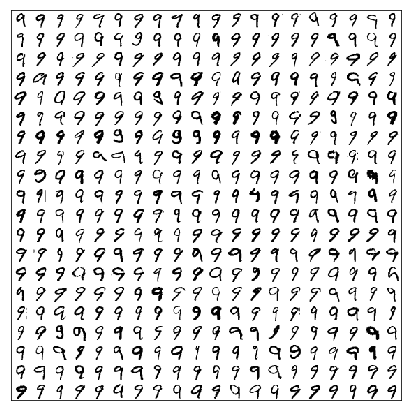

In [4]:
# or if you wish to view just one digit only
# set the label to y_train or y_test and digits to x_train or x_test

labels = y_train
digits = x_train

# max numbers to find
max_digit = ysize * xsize

# from where to show
ysize = 20
xsize = 20
start_offset = 100

image = np.zeros((28*ysize, 28*xsize), dtype=np.int)

# index
x = 0
y = 0

# find number
number_to_find = 9

print("showing number", number_to_find, ",from index:", start_offset, ",max label:", labels.shape[0])

i = start_offset
while i <= labels.shape[0]:
    if( labels[i] == number_to_find):
        image = copy_image( image, y, x, digits[i])
        x += 1
        if( x >= xsize):
            x = 0
            y += 1
            if( y >= ysize):
                break
    i += 1

plt.figure(figsize=(7,10))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image , cmap='gray_r')
plt.show()
plt.close()   

### lets try to implement the neural network in keras
The theory site references the following image:
![The Image From Site](tikz13.png)

However, the actual network has:
```
Input Layer: 784 (28x28)
Hidden Layer: 30
Output Layer: 10
```
The theory talks about SGD. For keras, here are the options:

```python
keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

Arguments

lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
```

In [5]:
# we are going to reshape and normalize the data

x_train_reshaped = x_train.reshape(x_train.shape[0],784)
x_test_reshaped = x_test.reshape(x_test.shape[0], 784)

x_train_reshaped = x_train_reshaped.astype('float32')
x_test_reshaped = x_test_reshaped.astype('float32')

x_train_reshaped /= 255.0
x_test_reshaped /= 255.0

y_hot_train = keras.utils.to_categorical(y_train, num_classes=10)
y_hot_test = keras.utils.to_categorical(y_test, num_classes=10)

print('x_train_reshaped:', x_train_reshaped.shape)
print('x_test_reshaped:', x_test_reshaped.shape)
print('y_hot_train:', y_hot_train.shape)
print('y_hot_test:', y_hot_test.shape)

x_train_reshaped: (60000, 784)
x_test_reshaped: (10000, 784)
y_hot_train: (60000, 10)
y_hot_test: (10000, 10)


### this will be VERY slow to run even on a PC with a GPU
but running it anyway

In [6]:
# define SGD model. NOT USING the theory's 3.0 which is too big
lr = 0.01
my_batch_size = 10
my_epochs = 30

mysgd = keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
# define the model

model = keras.models.Sequential()
# input layer is just 784 inputs coming in as defined in the hidden layer below

# hidden layer
model.add( keras.layers.Dense(30, input_shape=(784,), activation='sigmoid'))

#output layer
model.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model.compile(optimizer=mysgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [7]:
# lets run it
#train the model with train data
fit_history = model.fit(x_train_reshaped, y_hot_train,
  epochs=my_epochs ,
  batch_size=my_batch_size,
  validation_data=(x_test_reshaped,y_hot_test)
)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
60000/60000 [==============================] - 14s 236us/sample - loss: 0.4008 - acc: 0.8911 - val_loss: 0.2321 - val_acc: 0.9325
Epoch 2/30
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2163 - acc: 0.9378 - val_loss: 0.1951 - val_acc: 0.9422
Epoch 3/30
60000/60000 [==============================] - 14s 236us/sample - loss: 0.1736 - acc: 0.9504 - val_loss: 0.1684 - val_acc: 0.9491
Epoch 4/30
60000/60000 [==============================] - 14s 234us/sample - loss: 0.1502 - acc: 0.9570 - val_loss: 0.1427 - val_acc: 0.9585
Epoch 5/30
60000/60000 [==============================] - 13s 224us/sample - loss: 0.1344 - acc: 0.9617 - val_loss: 0.1371 - val_acc: 0.9603
Epoch 6/30
60000/60000 [==============================] - 13s 225us/sample - loss: 0.1233 - acc: 0.9646 - val_loss: 0.1296 - val_acc: 0.9627
Epoch 7/30
60000/60000 [==============================] 

### let's see how the model worked via graph

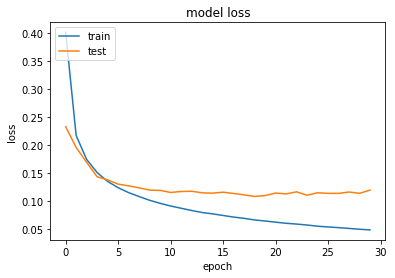

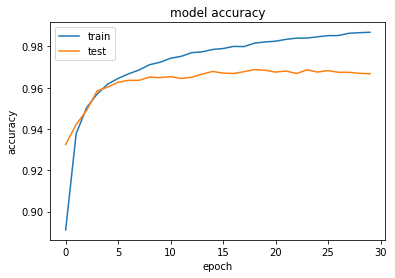

In [8]:
# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### the model is "over-fitting"
We will talk about that later... 
but let's see how the model predicted using "confusion matrix"


In [9]:
predictions = model.predict(x_test_reshaped)

my_matrix = np.zeros( (10,10), dtype='int')

# count of good guesses
count_matrix = np.zeros( (10,), dtype='int')
good_matrix = np.zeros( (10,), dtype='int')

# iterate through 10,000 test data
for i in range(10000):
    count_matrix[y_test[i]] +=1
    guess = np.argmax(predictions[i])
    if guess == y_test[i]:
        good_matrix[guess] +=1
    else:
        # increment [expected][guess] matrix
        my_matrix[y_test[i]][guess] += 1

# show good matrix
print('Good guesses:')
for i in range(10):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)

Good guesses:
match count for: 0 = 962 / 980 ( 98.16 %)
match count for: 1 = 1118 / 1135 ( 98.50 %)
match count for: 2 = 983 / 1032 ( 95.25 %)
match count for: 3 = 982 / 1010 ( 97.23 %)
match count for: 4 = 960 / 982 ( 97.76 %)
match count for: 5 = 849 / 892 ( 95.18 %)
match count for: 6 = 926 / 958 ( 96.66 %)
match count for: 7 = 1000 / 1028 ( 97.28 %)
match count for: 8 = 939 / 974 ( 96.41 %)
match count for: 9 = 949 / 1009 ( 94.05 %)


### confusion matrix
This shows how the expected digits were guessed by the model


Confusion Matrix


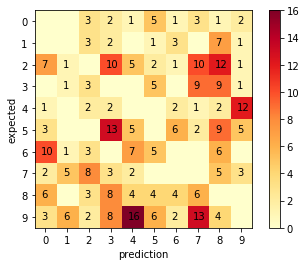

In [10]:
print('\nConfusion Matrix')

fig = plt.figure()
plt.xticks( range(10))
plt.yticks( range(10))

for y in range(10):
    for x in range(10):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix, cmap='YlOrRd')
plt.colorbar()
plt.show()
plt.close()

### see list of mis guessed digits


Expected: 9 , predicted: 4


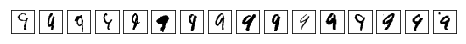

In [11]:
expected_number = 9
guessed_number = 4

print('Expected:', expected_number, ', predicted:', guessed_number)
non_match_list = []
for i in range(10000):
    if y_test[i] == expected_number:
        guess = np.argmax(predictions[i])
        if guess == guessed_number:
            non_match_list.append(i)

fig = plt.figure( figsize = (10,2))

for i in range(len(non_match_list)):
    plt.subplot(1,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = non_match_list[i]
    plt.imshow(x_test[index], cmap='gray_r')
plt.show()
plt.close()

### more "modern" ANN (artificial neural network)
using "adam" optimizer

In [12]:
model = keras.models.Sequential()
# input layer is just 784 inputs coming in as defined in the hidden layer below

# hidden layer
model.add( keras.layers.Dense(256, input_shape=(784,), activation='relu'))

#output layer
model.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
#train the model with train data
fit_history = model.fit(x_train_reshaped, y_hot_train,
  epochs=15 ,
  batch_size=200,
  validation_data=(x_test_reshaped,y_hot_test)
)


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3492 - acc: 0.9038 - val_loss: 0.1763 - val_acc: 0.9479
Epoch 2/15
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1511 - acc: 0.9574 - val_loss: 0.1219 - val_acc: 0.9643
Epoch 3/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1060 - acc: 0.9692 - val_loss: 0.1025 - val_acc: 0.9703
Epoch 4/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0789 - acc: 0.9775 - val_loss: 0.0866 - val_acc: 0.9748
Epoch 5/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0625 - acc: 0.9820 - val_loss: 0.0784 - val_acc: 0.9769
Epoch 6/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0500 - acc: 0.9863 - val_loss: 0.0744 - val_acc: 0.9776
Epoch 7/15
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0413 - acc: 0.9887 - val_loss: 0.

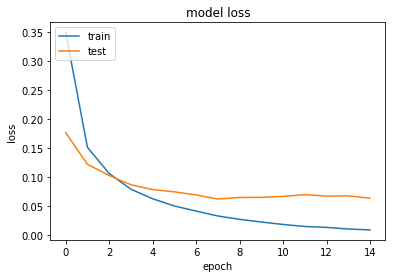

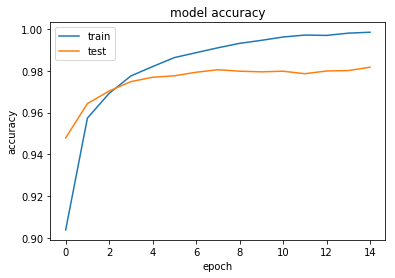

In [14]:
# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### the new activation function allows quicker "fitting", but still over fits
let's use drop out instead of regularization


In [17]:
model = keras.models.Sequential()
# input layer is just 784 inputs coming in as defined in the hidden layer below

# hidden layer
model.add( keras.layers.Dense(256, input_shape=(784,), activation='relu'))

# drop out
model.add( keras.layers.Dropout(rate=0.5))

#output layer
model.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [18]:
#train the model with train data
fit_history = model.fit(x_train_reshaped, y_hot_train,
  epochs=25 ,
  batch_size=200,
  validation_data=(x_test_reshaped,y_hot_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4548 - acc: 0.8660 - val_loss: 0.2006 - val_acc: 0.9412
Epoch 2/25
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2171 - acc: 0.9367 - val_loss: 0.1388 - val_acc: 0.9581
Epoch 3/25
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1692 - acc: 0.9518 - val_loss: 0.1140 - val_acc: 0.9659
Epoch 4/25
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1432 - acc: 0.9585 - val_loss: 0.0992 - val_acc: 0.9703
Epoch 5/25
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1238 - acc: 0.9625 - val_loss: 0.0874 - val_acc: 0.9734
Epoch 6/25
60000/60000 [==============================] - 1s 18us/sample - loss: 0.1106 - acc: 0.9671 - val_loss: 0.0831 - val_acc: 0.9752
Epoch 7/25
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0991 - acc: 0.9707 - val_loss: 0.

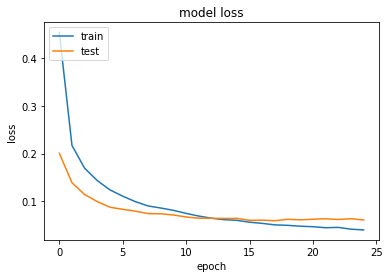

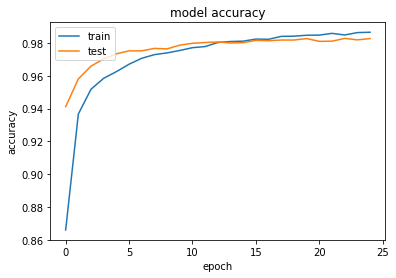

In [19]:
# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### slightly over fits, but not as bad
and the model predicts better

In [20]:
predictions = model.predict(x_test_reshaped)

my_matrix = np.zeros( (10,10), dtype='int')

# count of good guesses
count_matrix = np.zeros( (10,), dtype='int')
good_matrix = np.zeros( (10,), dtype='int')

# iterate through 10,000 test data
for i in range(10000):
    count_matrix[y_test[i]] +=1
    guess = np.argmax(predictions[i])
    if guess == y_test[i]:
        good_matrix[guess] +=1
    else:
        # increment [expected][guess] matrix
        my_matrix[y_test[i]][guess] += 1

# show good matrix
print('Good guesses:')
for i in range(10):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)

Good guesses:
match count for: 0 = 972 / 980 ( 99.18 %)
match count for: 1 = 1126 / 1135 ( 99.21 %)
match count for: 2 = 1018 / 1032 ( 98.64 %)
match count for: 3 = 990 / 1010 ( 98.02 %)
match count for: 4 = 963 / 982 ( 98.07 %)
match count for: 5 = 875 / 892 ( 98.09 %)
match count for: 6 = 939 / 958 ( 98.02 %)
match count for: 7 = 1007 / 1028 ( 97.96 %)
match count for: 8 = 953 / 974 ( 97.84 %)
match count for: 9 = 984 / 1009 ( 97.52 %)



Confusion Matrix


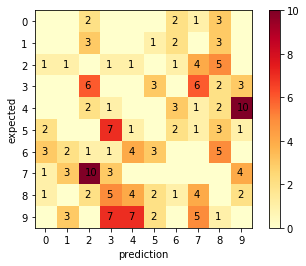

In [21]:
print('\nConfusion Matrix')

fig = plt.figure()
plt.xticks( range(10))
plt.yticks( range(10))

for y in range(10):
    for x in range(10):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix, cmap='YlOrRd')
plt.colorbar()
plt.show()
plt.close()